#Logistic Regression

Some of the code implemented here was taken from the sklearn website. In particular, from this link :http://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#example-neural-networks-plot-rbm-logistic-classification-py

In [1]:
%matplotlib inline 

In [2]:

import pandas


In [3]:
#Getting the data
test = pandas.read_csv("test_inputs.csv")
x = pandas.read_csv("train_inputs.csv")
y = pandas.read_csv("train_outputs.csv")
    

In [4]:
testX = pandas.read_csv("test_inputs.csv")

In [5]:
from __future__ import print_function

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline



Automatically created module for IPython interactive environment


In [6]:
testX = np.asarray(testX)

In [7]:
tX = testX[:,1:2304]

In [8]:
X = np.asarray(x)

In [9]:
Y = np.asarray(y)

In [10]:
X[:,1:2]

array([[ 0.25098041],
       [ 0.39607844],
       [ 0.11372549],
       ..., 
       [ 0.18431373],
       [ 0.11372549],
       [ 0.30588236]])

In [11]:
Y[:,1]
Xd = X[:,1:2304]
Yd = Y[:,1]

In [12]:
Xd = X[:,1:2304]
Yd = Y[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(Xd, Yd,
                                                    test_size=0.2,
                                                    random_state=0)

In [13]:
len(X_test)

10000

In [14]:
X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001)  

In [15]:
X_test = (X_test - np.min(X_test, 0)) / (np.max(X_test, 0) + 0.0001)  

In [16]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

##Training logistic regression.

In [18]:
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 5000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=1.0)
logistic_classifier.fit(X_train, Y_train)

###############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))


[BernoulliRBM] Iteration 1, pseudo-likelihood = -1336.64, time = 22.63s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1320.19, time = 25.48s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1314.70, time = 23.81s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1315.36, time = 23.91s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1320.59, time = 25.59s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1320.06, time = 27.81s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1309.30, time = 24.48s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1314.02, time = 23.95s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1320.44, time = 23.29s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1309.99, time = 23.28s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1312.09, time = 23.29s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1306.20, time = 23.74s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1301.97, time = 23.81s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1303.48, t

In [27]:
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 7000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)

###############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1336.64, time = 23.21s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1320.19, time = 24.82s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1314.70, time = 23.03s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1315.36, time = 23.51s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1320.59, time = 22.80s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1320.06, time = 23.09s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1309.30, time = 23.48s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1314.02, time = 23.33s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1320.44, time = 23.08s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1309.99, time = 22.85s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1312.09, time = 22.98s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1306.20, time = 23.89s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1301.97, time = 22.51s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1303.48, t

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = Xd, Yd
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y).astype(np.int)


# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    #l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   #cmap='binary', vmax=1, vmin=0)
    #2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   #cmap='binary', vmax=1, vmin=0)
    #plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()

In [23]:
from sklearn.metrics import confusion_matrix

In [19]:
predictions = logistic_classifier.predict(X_test)

In [20]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    labels = [0, 1, 2, 3,4,5,6,7,8,9]
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
cm = confusion_matrix(Y_test, predictions)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)

Confusion matrix
[[599   8  75  60  41  37  84  61  20  55]
 [  7 671  63  71  51  53  27  35 121  28]
 [119 110 187  82  82  54  66  92  90  49]
 [ 94 108  85 246  21 139  70  23 146  49]
 [ 39  90  99  31 244  57  69 186  50 147]
 [ 68  68  48 122  61 202  68  69  81 102]
 [ 99  51  56  71  82  60 241 121  48 142]
 [ 65  52  81  21 161  46  91 334  30 136]
 [ 28 249  76 157  42  69  63  34 250  37]
 [ 63  37  50  40 132 100 110 167  36 292]]


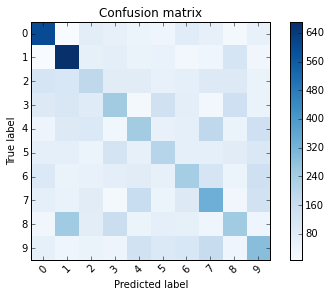

In [25]:
plt.figure()
plot_confusion_matrix(cm)
plt.show()

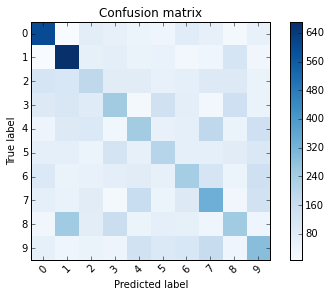

In [26]:
plt.figure()
plot_confusion_matrix(cm)
plt.show()

In [19]:
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 5000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=0.1)
logistic_classifier.fit(X_train, Y_train)

###############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1336.64, time = 21.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1320.19, time = 25.55s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1314.70, time = 24.68s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1315.36, time = 27.13s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1320.59, time = 27.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1320.06, time = 26.94s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1309.30, time = 25.89s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1314.02, time = 25.54s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1320.44, time = 23.93s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1309.99, time = 24.86s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1312.09, time = 24.29s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1306.20, time = 25.08s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1301.97, time = 24.24s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1303.48, t

In [20]:
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 5000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=0.01)
logistic_classifier.fit(X_train, Y_train)

###############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1336.64, time = 21.71s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1320.19, time = 23.99s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1314.70, time = 24.72s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1315.36, time = 23.79s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1320.59, time = 22.51s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1320.06, time = 23.75s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1309.30, time = 22.46s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1314.02, time = 22.93s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1320.44, time = 22.38s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1309.99, time = 22.43s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1312.09, time = 22.51s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1306.20, time = 23.59s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1301.97, time = 25.52s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1303.48, t

In [17]:
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 5000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=1000.0)
logistic_classifier.fit(X_train, Y_train)

###############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1336.64, time = 24.54s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1320.19, time = 24.97s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1314.70, time = 24.43s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1315.36, time = 23.09s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1320.59, time = 23.80s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1320.06, time = 24.85s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1309.30, time = 25.31s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1314.02, time = 28.71s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1320.44, time = 26.30s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1309.99, time = 26.87s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1312.09, time = 23.60s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1306.20, time = 24.19s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1301.97, time = 26.58s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1303.48, t

In [18]:
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 5000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)

###############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1336.64, time = 24.77s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1320.19, time = 27.64s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1314.70, time = 23.52s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1315.36, time = 22.96s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1320.59, time = 23.07s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1320.06, time = 23.27s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1309.30, time = 22.48s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1314.02, time = 22.56s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1320.44, time = 22.30s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1309.99, time = 22.15s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1312.09, time = 22.43s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1306.20, time = 22.43s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1301.97, time = 22.56s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1303.48, t

In [19]:
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 5000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=1.0)
logistic_classifier.fit(X_train, Y_train)

###############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1336.64, time = 26.17s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1320.19, time = 23.85s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1314.70, time = 25.92s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1315.36, time = 23.27s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1320.59, time = 23.22s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1320.06, time = 25.64s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1309.30, time = 28.17s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1314.02, time = 27.56s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1320.44, time = 25.89s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1309.99, time = 25.56s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1312.09, time = 25.38s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1306.20, time = 24.30s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1301.97, time = 26.43s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1303.48, t

In [17]:
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 5000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=0.01)
logistic_classifier.fit(X_train, Y_train)

###############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1334.11, time = 23.98s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1330.54, time = 25.96s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1323.12, time = 26.89s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1316.09, time = 26.77s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1315.98, time = 27.24s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1311.79, time = 25.06s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1310.62, time = 27.81s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1314.04, time = 30.77s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1308.09, time = 38.36s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1312.89, time = 32.69s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1311.44, time = 31.69s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1309.10, time = 28.96s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1310.59, time = 26.05s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1310.15, t

In [24]:
predictions = logistic_classifier.predict(X_test)

In [25]:
cm = confusion_matrix(Y_test, predictions)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)

Confusion matrix
[[663  11  50  68  30  36  68  49  12  53]
 [  6 783  47  57  22  46  18  24  99  25]
 [137 119 209  73  73  52  55  91  72  50]
 [ 92 136  75 298  13 118  62  18 131  38]
 [ 38 107  80  21 296  52  68 203  32 115]
 [ 83  79  43 135  48 212  65  68  56 100]
 [103  64  55  54  68  58 263 126  44 136]
 [ 56  64  60  17 149  44  87 368  22 150]
 [ 15 288  70 166  55  59  44  27 246  35]
 [ 57  46  33  36 126  89 120 191  27 302]]


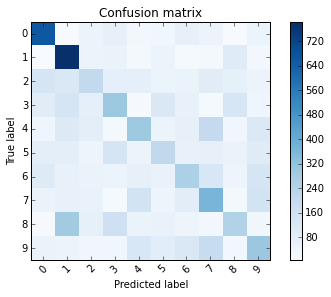

In [26]:
plt.figure()
plot_confusion_matrix(cm)
plt.show()

In [46]:
from sklearn.metrics import roc_curve


In [28]:
var1 = cm[1,1]+cm[2,2]+cm[3,3]+cm[0,0]+ cm[4,4]+ cm[5,5]+ cm[6,6]+ cm[7,7]+ cm[8,8]

In [29]:
var2 = sum(cm[1,:])+sum(cm[2,:])+sum(cm[3,:])+sum(cm[0,:])+sum(cm[4,:])+sum(cm[5,:])+sum(cm[6,:])+sum(cm[7,:])+sum(cm[8,:])

In [30]:
print ("Classifier accuracy with C : 0.01  -> " + str(var1/ float(var2)))

Classifier accuracy with C : 0.01  -> 0.3720049036


In [43]:
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 5000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=0.001)
logistic_classifier.fit(X_train, Y_train)

###############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1336.64, time = 23.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1320.19, time = 35.06s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1314.70, time = 33.18s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1315.36, time = 28.44s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1320.59, time = 34.83s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1320.06, time = 44.27s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1309.30, time = 34.10s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1314.02, time = 25.52s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1320.44, time = 26.83s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1309.99, time = 32.77s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1312.09, time = 30.46s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1306.20, time = 33.36s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1301.97, time = 35.05s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1303.48, t